### * RNN 주요 레이어 종류
#### (1) SimpleRNN :가장 간단한 형태의 RNN레이어, 활성화 함수로 tanh가 사용됨(tanh: -1 ~ 1 사이의 값을 반환)
#### (2) LSTM(Long short Term Memory) : 입력 데이터와 출력 사이의 거리가 멀어질수로 연관 관계가 적어진다(Long Term Dependency,장기의존성 문제), LSTM은 장기 의존성 문제를 해결하기 위해 출력값외에 셀상태(cell state)값을 출력함, 활성화 함수로 tanh외에 sigmoid가 사용됨
#### (3) GRU(Gated Recurent Unit) : 뉴욕대 조경현 교수 등이 제안, LSTM보다 구조가 간단하고 성능이 우수함

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Sequence data
X = np.array([[0,1,2,3],
              [1,2,3,4],
              [2,3,4,5],
              [3,4,5,6],
              [4,5,6,7],
              [5,6,7,8]],dtype=np.float32)

x_data = tf.reshape(X,(-1,4,1))  # (6,4,1)

y_data = np.array([4,5,6,7,8,9],dtype=np.float32)

print(x_data.shape,y_data.shape)
# print(type(x_data),type(y_data))
x_data

(6, 4, 1) (6,)


<tf.Tensor: shape=(6, 4, 1), dtype=float32, numpy=
array([[[0.],
        [1.],
        [2.],
        [3.]],

       [[1.],
        [2.],
        [3.],
        [4.]],

       [[2.],
        [3.],
        [4.],
        [5.]],

       [[3.],
        [4.],
        [5.],
        [6.]],

       [[4.],
        [5.],
        [6.],
        [7.]],

       [[5.],
        [6.],
        [7.],
        [8.]]], dtype=float32)>

### [1] SimpleRNN
#### 가장 간단한 형태의 RNN

# tanh() 함수 : Hyperbolic Tangent(tanh)

1.0
1.0


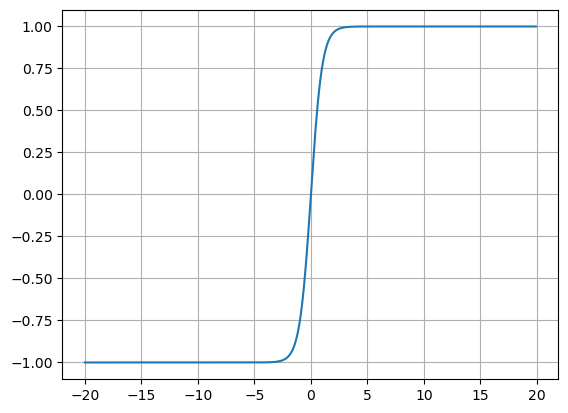

In [3]:
# Hyperbolic Tangent 함수는 확장 된 시그모이드 함수이다
# tanh와 Sigmoid의 차이점은 Sigmoid의 출력 범위가 0에서 1 사이인 반면 tanh와 출력 범위는 -1에서 1사이라는 점이다
# Sigmoid와 비교하여 tanh와는 출력 범위가 더 넓고 경사면이 큰 범위가 더 크기 때문에 더 빠르게 수렴하여 학습하는 특성이 있다
# http://taewan.kim/post/tanh_diff/
import matplotlib.pyplot as plt

x = np.arange(-200,200)
x = x/10
y = np.tanh(x)

plt.plot(x,y)
plt.grid(True)
print(np.tanh(19))
print(np.tanh(20))

In [7]:
# RNN 순환 신경망 구현  : SimpleRNN
model = tf.keras.Sequential([
    # X:(N,T,D);(None,4,1) --> (N,T,H):(None,4,300)
    # X;(None,1), Wx:(1,300), Wh:(300,300), b:(300,), 1*300+300*300+300=90600
    tf.keras.layers.SimpleRNN(units=300,return_sequences=True,input_shape=[4,1]),
    # X;(None,300), Wx:(300,300), Wh:(300,300), b:(300,), 300*300+300*300+300=90600
    tf.keras.layers.SimpleRNN(units=300),
    
    # X:(None,300), W:(300,1), b(1,)
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 4, 300)            90600     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 300)               180300    
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 271,201
Trainable params: 271,201
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 학습
model.fit(x_data,y_data,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 48.2216
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 1.3669
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 5.6697
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 7.6609
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 4.1931
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 1.4858
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 2.0735
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 3.4607
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 3.1910
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 1.9911
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0880
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8273
Epoch 13/100
1/1 [==============================] - 0

In [9]:
# 예측
model.predict(x_data)

1/1 [==============================] - 0s 146ms/step


array([[3.997648 ],
       [4.958444 ],
       [5.9701304],
       [7.0583277],
       [8.060773 ],
       [8.878193 ]], dtype=float32)

In [10]:
y_data

array([4., 5., 6., 7., 8., 9.], dtype=float32)

In [11]:
# 학습되지 않은 입력 데이터에 대한 예측 결과
print(model.predict(np.array([[[6.],[7.],[8.],[9.]]])))
print(model.predict(np.array([[[-1.],[0.],[1.],[2.]]])))

1/1 [==============================] - 0s 13ms/step
[[9.489226]]
1/1 [==============================] - 0s 13ms/step
[[1.2293345]]


In [12]:
# 평가
model.evaluate(x_data,y_data)

1/1 [==============================] - 0s 163ms/step - loss: 0.0041


0.004092840477824211

### [2] LSTM(Long short Term Memory)
#### 입력 데이터와 출력 사이의 거리가 멀어질수로 연관 관계가 적어진다(Long Term Dependency,장기의존성 문제)
#### LSTM은 장기 의존성 문제를 해결하기 위해 출력값외에 셀상태(cell state)값을 출력함

In [13]:
# RNN 순환 신경망 구현  : LSTM
model = tf.keras.Sequential([
    # X:(N,T,D);(None,4,1) --> (N,T,H):(None,4,300)
    # X;(None,1), Wx:(1,4*300), Wh:(300,4*300), b:(4*300,), 1*4*300+300*4*300+4*300=90600
    tf.keras.layers.LSTM(units=300,return_sequences=True,input_shape=[4,1]),
    tf.keras.layers.LSTM(units=300),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 300)            362400    
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 1,083,901
Trainable params: 1,083,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 학습
model.fit(x_data,y_data,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 45.7339
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 39.2950
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 32.9209
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 26.0268
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 18.4167
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5327
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 3.9304
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3489
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 4.2169
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9874
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8203
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 4.8873
Epoch 13/100
1/1 [==============================] - 0

In [15]:
# 예측
model.predict(x_data)

1/1 [==============================] - 0s 304ms/step


array([[3.3717146],
       [5.092054 ],
       [6.3724947],
       [7.3079605],
       [8.000937 ],
       [8.524953 ]], dtype=float32)

In [16]:
y_data

array([4., 5., 6., 7., 8., 9.], dtype=float32)

In [17]:
# 학습되지 않은 입력 데이터에 대한 예측 결과
print(model.predict(np.array([[[6.],[7.],[8.],[9.]]])))
print(model.predict(np.array([[[-1.],[0.],[1.],[2.]]])))

1/1 [==============================] - 0s 13ms/step
[[8.928904]]
1/1 [==============================] - 0s 11ms/step
[[1.2652546]]


In [18]:
# 평가
model.evaluate(x_data,y_data)

1/1 [==============================] - 0s 346ms/step - loss: 0.1437


0.1437465101480484

### [3] GRU(Gated Recurrent Unit)
#### 뉴욕대 조경현 교수 등이 제안, LSTM보다 구조가 간단하고 성능이 우수
https://wikidocs.net/22889

In [21]:
# RNN 순환 신경망 구현  : GRU
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=300,return_sequences=True,input_shape=[4,1]),
    tf.keras.layers.GRU(units=300),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 300)            272700    
                                                                 
 gru_1 (GRU)                 (None, 300)               541800    
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 814,801
Trainable params: 814,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 학습
model.fit(x_data,y_data,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 43.6955
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 26.6321
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.1150
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 3.6790
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6075
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 4.4128
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 6.9510
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 5.7864
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 3.2213
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1663
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2918
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4016
Epoch 13/100
1/1 [==============================] - 

In [23]:
# 예측
model.predict(x_data)

1/1 [==============================] - 0s 282ms/step


array([[3.643906 ],
       [5.017784 ],
       [6.1989465],
       [7.1960444],
       [8.02816  ],
       [8.718017 ]], dtype=float32)

In [24]:
y_data

array([4., 5., 6., 7., 8., 9.], dtype=float32)

In [25]:
# 학습되지 않은 입력 데이터에 대한 예측 결과
print(model.predict(np.array([[[6.],[7.],[8.],[9.]]])))
print(model.predict(np.array([[[-1.],[0.],[1.],[2.]]])))

1/1 [==============================] - 0s 13ms/step
[[9.2881]]
1/1 [==============================] - 0s 11ms/step
[[2.0888727]]


In [26]:
# 평가
model.evaluate(x_data,y_data)

1/1 [==============================] - 0s 302ms/step - loss: 0.0476


0.047573309391736984